# Importing libraries

In [1]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

# Importing files

In [2]:
path_fao = "FAO.csv"
path_food_prod = "Food_Production.csv"

df_fao = pd.read_csv(path_fao, encoding='latin-1')
df_food_prod = pd.read_csv(path_food_prod, encoding='latin-1')

# Cleaning the dataset

In [3]:
useless_features = ['Area Abbreviation', 'Area Code', 'Item Code', 'Element Code', 'latitude', 'longitude']
df_fao.drop(columns=useless_features, inplace=True)

# Grouping the data

In [4]:
# Calculating total production for each country
df_fao['Total Production'] = df_fao.iloc[:, 4:].sum(axis=1)

# Calculating total food and feed production for each country
food_feed = df_fao.groupby(['Area', 'Element'])['Total Production'].sum().reset_index()
food_feed_pivot = food_feed.pivot_table(index='Area', columns='Element', values='Total Production').reset_index()

# Calculating food:feed ratio

In [5]:
food_feed_pivot['Food Proportion'] = food_feed_pivot['Food'] / (food_feed_pivot['Food'] + food_feed_pivot['Feed'])
food_feed_pivot['Feed Proportion'] = food_feed_pivot['Feed'] / (food_feed_pivot['Food'] + food_feed_pivot['Feed'])

# Plots

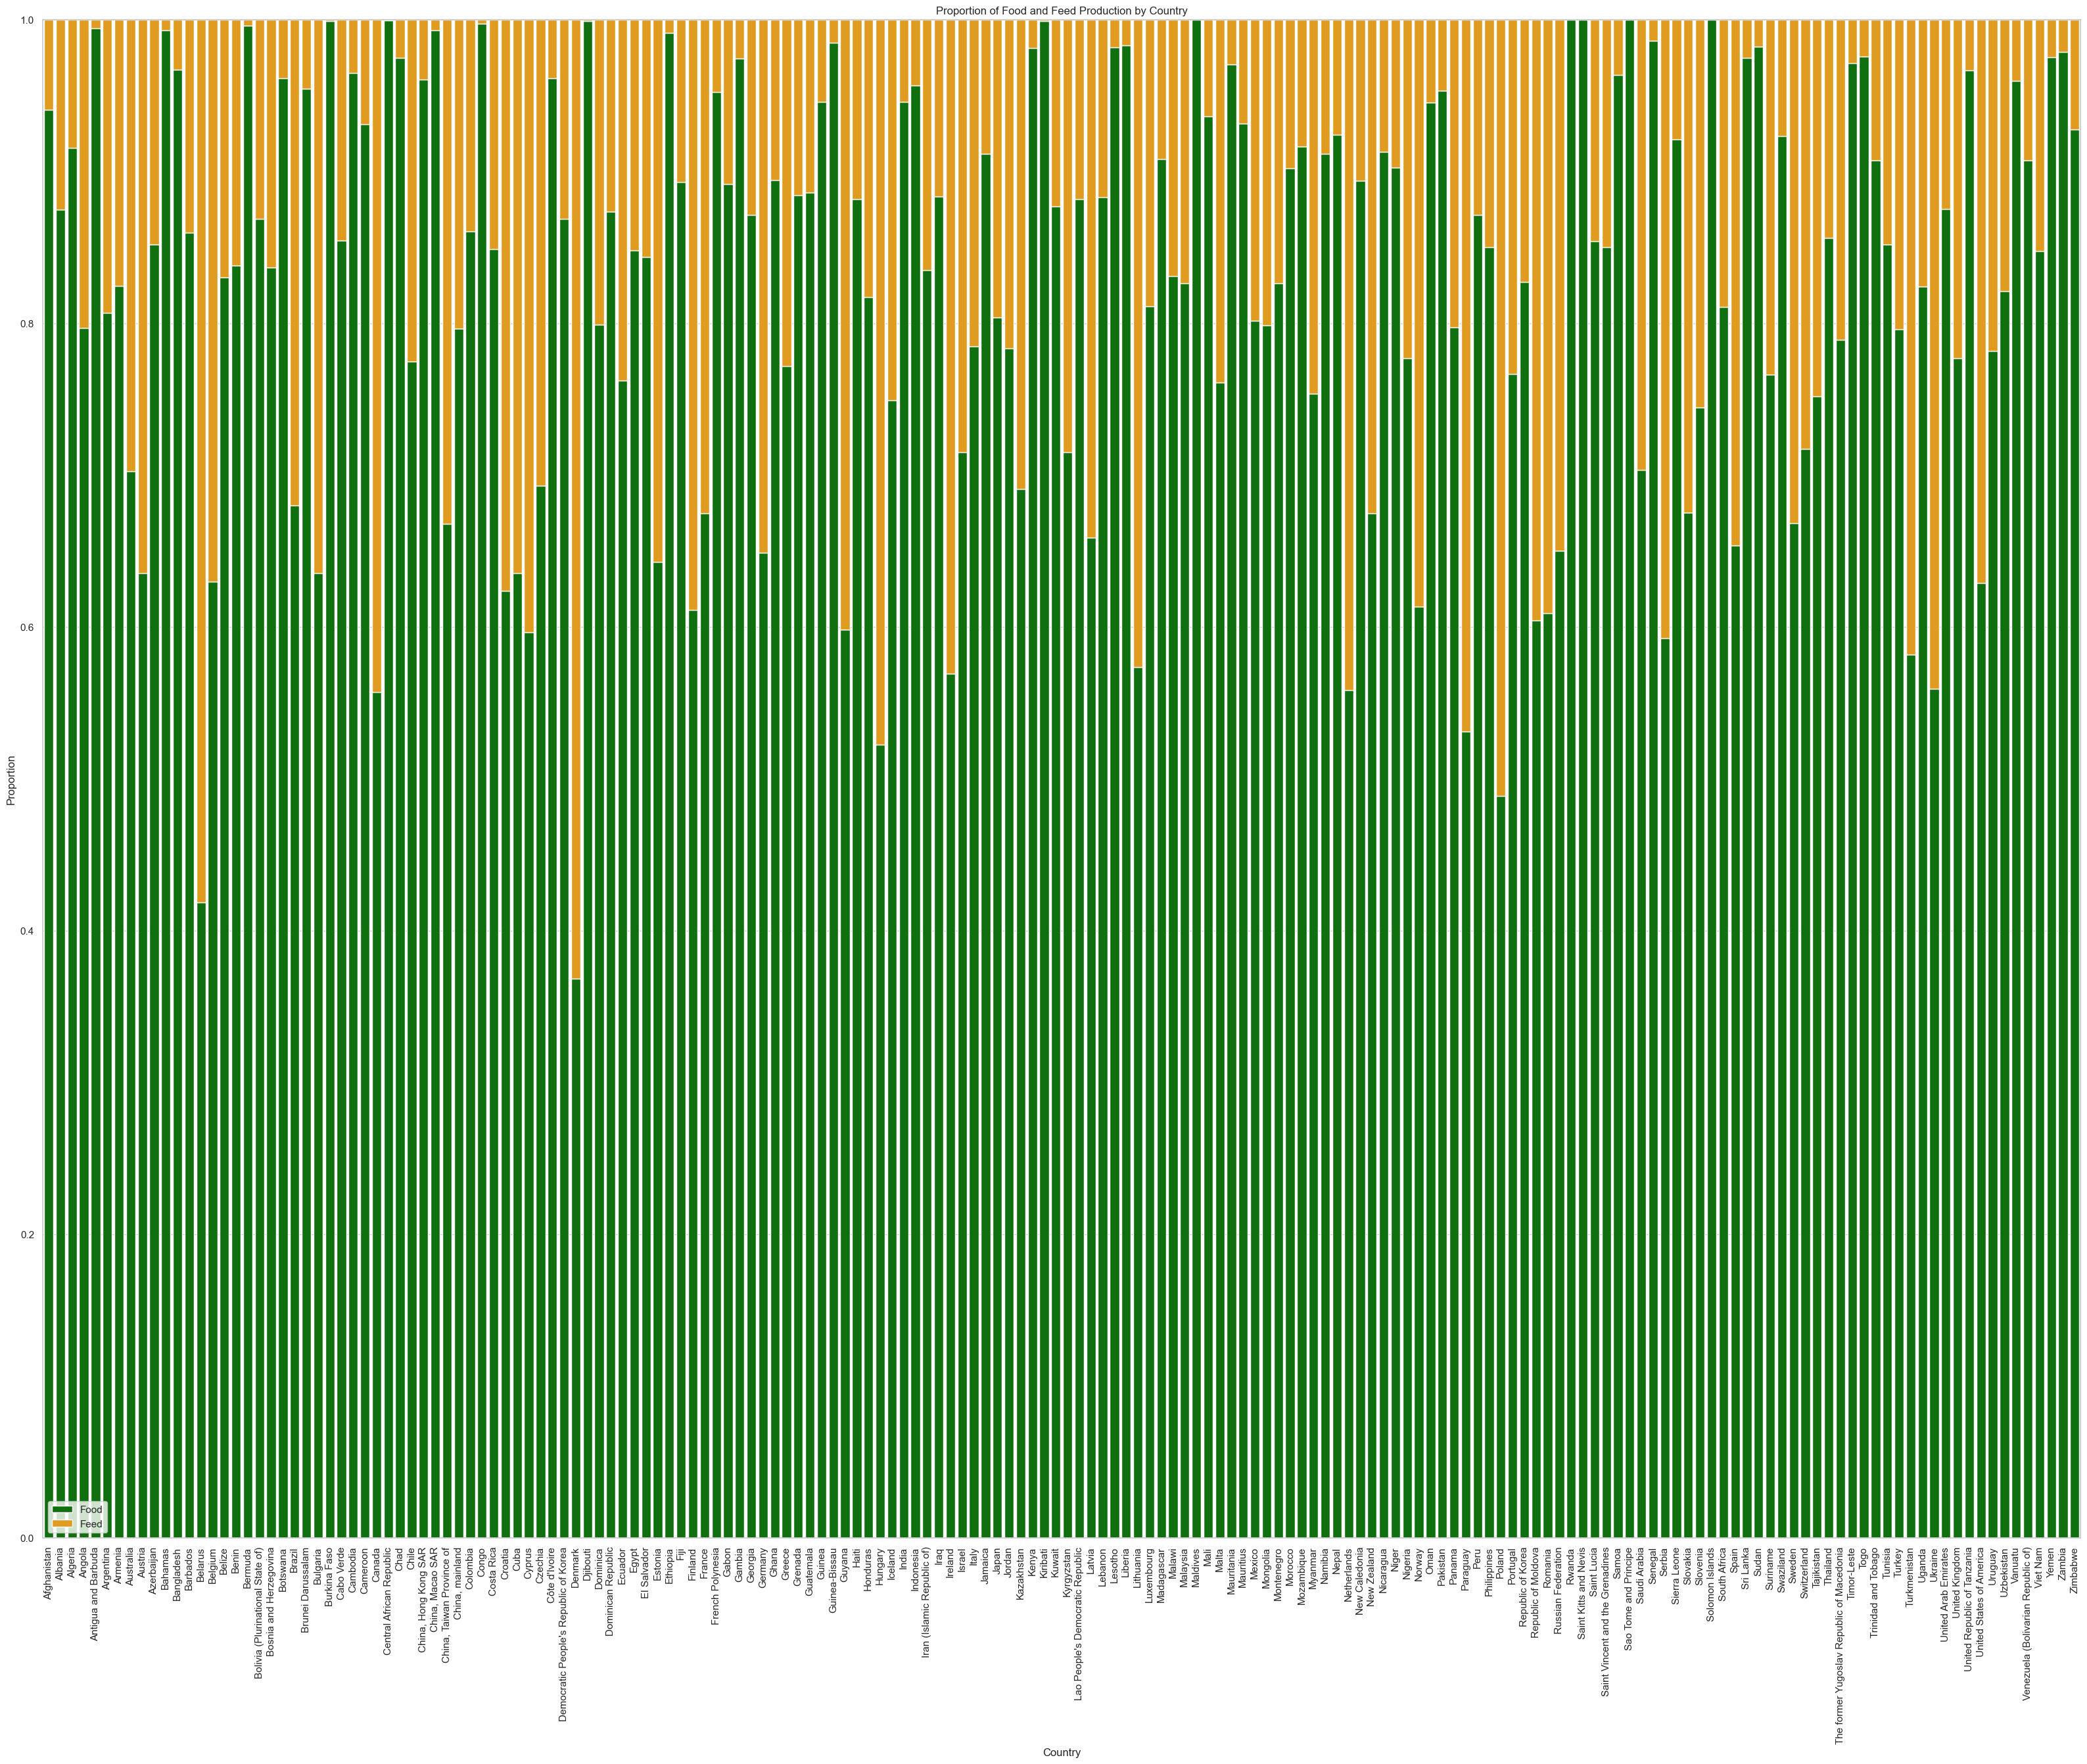

In [6]:
plt.figure(figsize=(40, 30))
sns.set_theme(style="whitegrid")

ax = sns.barplot(x='Area', y='Food Proportion', data=food_feed_pivot, color='green', label='Food')
ax = sns.barplot(x='Area', y='Feed Proportion', data=food_feed_pivot, color='orange', bottom=food_feed_pivot['Food Proportion'], label='Feed')

ax.set(xlabel='Country', ylabel='Proportion', title='Proportion of Food and Feed Production by Country')
plt.xticks(rotation=90)
plt.legend()

plt.show()